# Bay Wheels - Find Patterns in Bike Ridership
## by Shilpa Madini

## Investigation Overview

> In this investigation, I wanted to look at the Bay Wheels trip data and analyse how ridership pattern is affected by the subscription type and day of the week. Data set I used for this anlysic can be found at [Bay Wheels  System Data](https://www.lyft.com/bikes/bay-wheels/system-data)

## Dataset Overview

### Structure of the dataset?

> I have used 2017 year data for this analysis.There are 519700 observations with 13 features. 

#### Each trip is anonymized and includes:
> 1. Trip Duration (seconds)
> 2. Start Time and Date
> 3. End Time and Date
> 4. Start Station ID
> 5. Start Station Name
> 6. Start Station Latitude
> 7. Start Station Longitude
> 8. End Station ID
> 9. End Station Name
> 10. End Station Latitude
> 11. End Station Longitude
> 12. Bike ID
> 13. User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

#### Following features are engineered from the original dataset
> 14. month (month of the year,extracted from start time and Date)
> 15. weekday (day of the week, extracted from start time and Date)
> 16. duration-min (calculated using duration-sec, represents the duration in minutes)

### Main feature(s) of interest in the dataset?

> 1. When are most trips taken interms of day of the week, month of the year?
> 2. Top 10 station names where most trips are originated?
> 2. How long is the average trip taken?
> 4. Significance of user type on the number of rides and average duration?

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# read the clean data set into pandas dataframe 
bikedata  = pd.read_csv('data/bikedata_clean.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [4]:
# convert weekday , month into ordered categorical types

ordinal_var_dict = {'weekday' : ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                    'month' : ['Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']   
                   }
for var in ordinal_var_dict:
    bikedata[var] =  bikedata[var].astype('category', categories = ordinal_var_dict[var], ordered = True)

In [5]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 16 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
month                      519700 non-null category
weekday                    519700 non-null category
duration_mins              519700 non-null float64
dtypes: category(2), float64(5), int64(4), object(5)
memory usage: 56.5+ MB


##  Distribution of Ride Duration
ride duration in the dataset takes on a very large range of values, from 1 min 1439 mins. But most of the data is less than 200 mins.  After plotted on a logarithmic scale, the distribution of ride duration takes on a normal distribution with slight skew to the left.

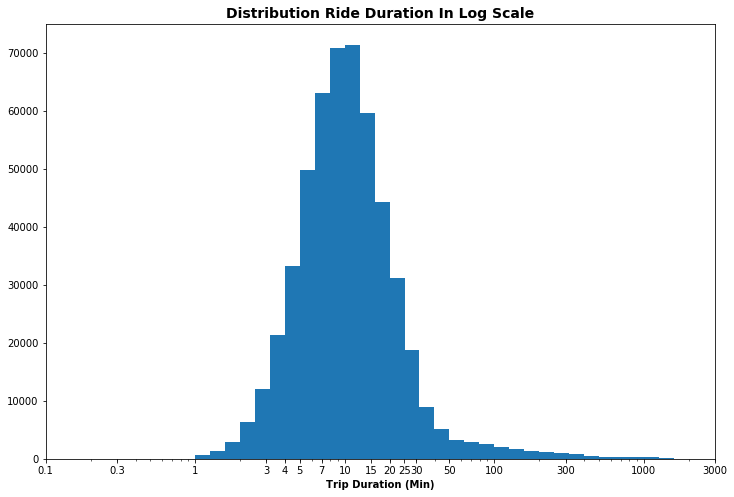

In [6]:
log_bin_size = 0.1
log_bins = 10 ** np.arange(0, np.log10(bikedata['duration_mins'].max())+log_bin_size, log_bin_size)
tick_locs = [0.1,0.3,1,3,4,5,7,10,15,20,25,30,50, 100, 300, 1000, 3000]
tick_labels = ['{}'.format(v) for v in tick_locs]

plt.figure(figsize = [12,8])
plt.hist(data = bikedata, x = 'duration_mins', bins = log_bins)
plt.xscale('log')
plt.xticks(tick_locs, tick_labels)
plt.title('Distribution Ride Duration in Log Scale'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Trip Duration (Min)'.title(),fontsize = 10, weight = 'bold')
plt.show()

## When are most rides taken in terms of day of the week?

> This plot shows that most trips are taken on a tuesday. Weekdays seem to have more number of trips than weekends.

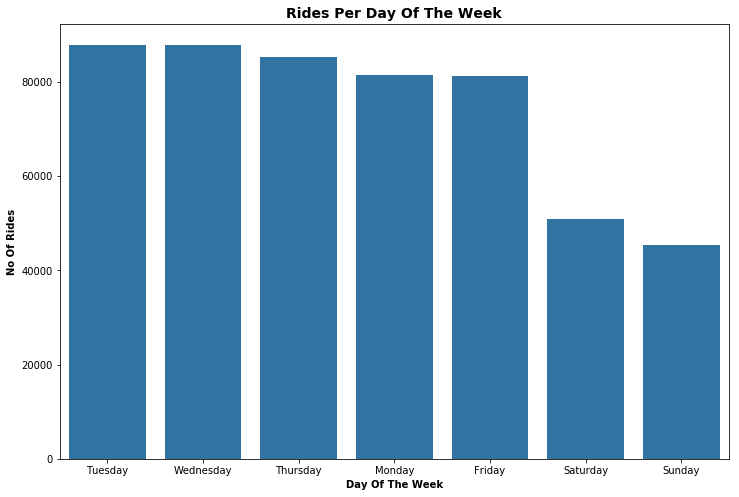

In [7]:
# let's plot two categories  together to get an idea of each  variable's distribution.
plt.figure(figsize = [12,8])
day_order = bikedata['weekday'].value_counts().index
default_color = sb.color_palette()[0]
sb.countplot(data = bikedata, x = 'weekday', color = default_color, order = day_order)
# add labels
plt.title('Rides Per Day of the week'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Day of the week'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('No of Rides'.title(),fontsize = 10, weight = 'bold');

plt.show()


## When are most rides taken interms of month of the year?

> October is the month where most number of trips are recorded.

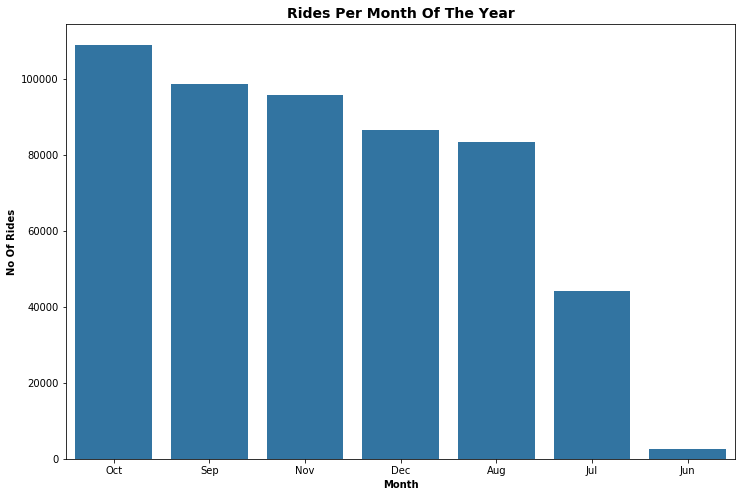

In [8]:
plt.figure(figsize = [12,8])
month_order = bikedata['month'].value_counts().index
default_color = sb.color_palette()[0]
sb.countplot(data = bikedata, x = 'month', color = default_color,order = month_order)
# labels
plt.title('Rides Per Month of the year'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Month'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('No of Rides'.title(),fontsize = 10, weight = 'bold');

plt.show()

## Which User Type Has Most Number of Rides?
Subscribers have the most number of rides than customers.


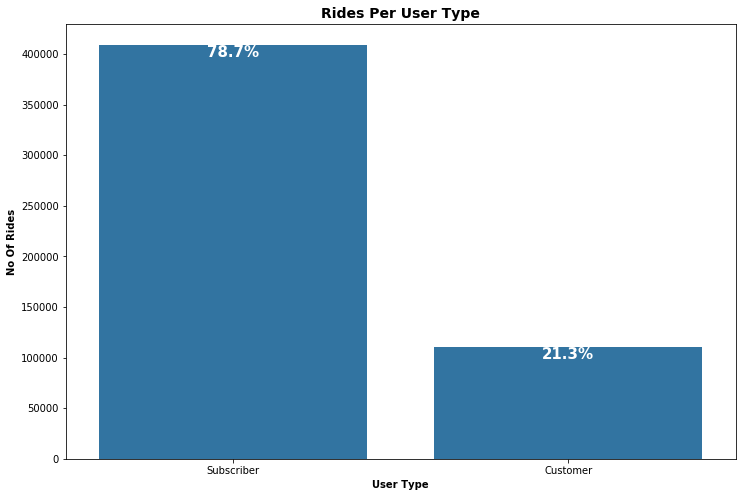

In [9]:
plt.figure(figsize = [12,8])

# create the plot
base_color = sb.color_palette()[0]
cat_order = bikedata['user_type'].value_counts().index
sb.countplot(data = bikedata, x = 'user_type', color = base_color, order = cat_order);

# add labels
plt.title('Rides Per User Type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('User Type'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('No of Rides'.title(),fontsize = 10, weight = 'bold');


# add annotations
n_points = bikedata.shape[0]
cat_counts = bikedata['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations

# loop through each pait of locations and labels
for loc , label in zip(locs, labels):
    
    # get the text property for the label
    
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)
    
    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, ha = 'center', va='top', color = 'w', weight = 'heavy',fontsize = 15)

plt.show()

## Top 10 station names where most trips are originated?
Plot below displays the top 10 stations where most of the trips are originated. This is an interesting obervation along with most rides being on weekdays. Bikeshare company can dispatch more bikes rentingstations at these staions to market more at these stations to attract more customers.

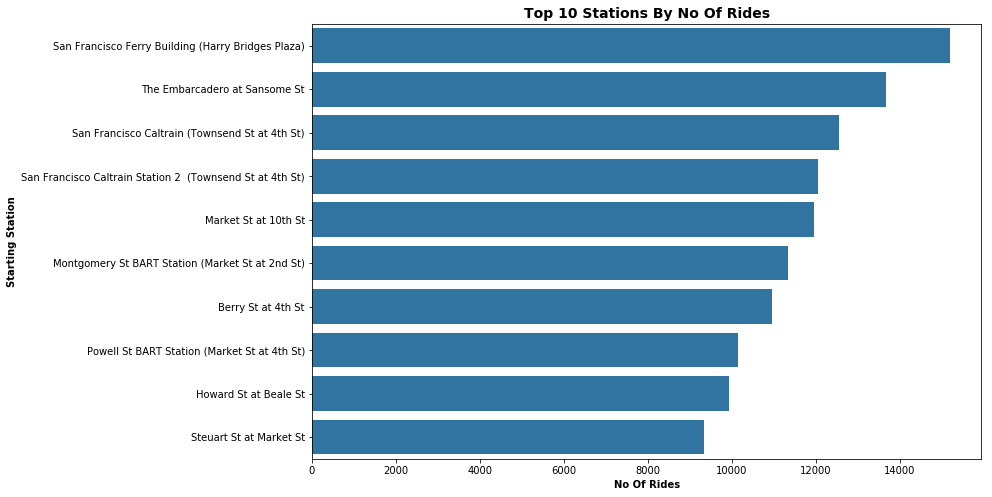

In [10]:
# plot for starting station
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]
station_counts = bikedata['start_station_name'].value_counts().head(10);
sb.barplot(station_counts,station_counts.index.values, color = base_color);
# labels
plt.title('Top 10 stations by No of Rides'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('No of Rides'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Starting Station'.title(),fontsize = 10, weight = 'bold');
plt.show()

## Average Ride Duration by Day Of The Week

Average trip duration on weekdays ( Mon to Fri) is pretty much consistant and value ranges between 15mins to 17 mins
Average trip duration on weekends ( Sat and Sun) ranges between 20 to 30 mins



In [12]:
bikedata_sub = bikedata.loc[bikedata['duration_mins'] < 50]

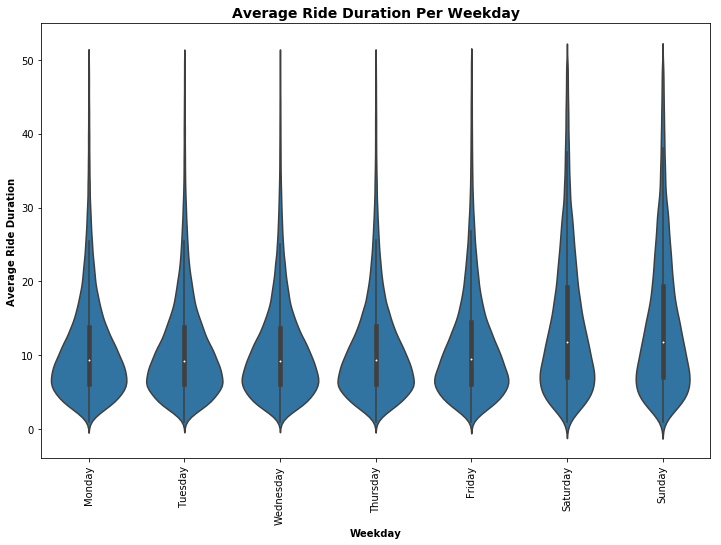

In [13]:
plt.figure(figsize = [12,8])
base_color = sb.color_palette()[0]

# violin plot
sb.violinplot(data = bikedata_sub, x = 'weekday', y = 'duration_mins', color = base_color)
plt.xticks(rotation = 90)
# labels
plt.title('Average ride duration per weekday'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('Weekday'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Average Ride Duration'.title(),fontsize = 10, weight = 'bold');
plt.show()

In [14]:
bikedata_week = bikedata.groupby('weekday')
bikedata_week.duration_mins.mean()

weekday
Monday       16.135181
Tuesday      15.567019
Wednesday    15.294549
Thursday     16.259663
Friday       17.278022
Saturday     26.976056
Sunday       29.410955
Name: duration_mins, dtype: float64

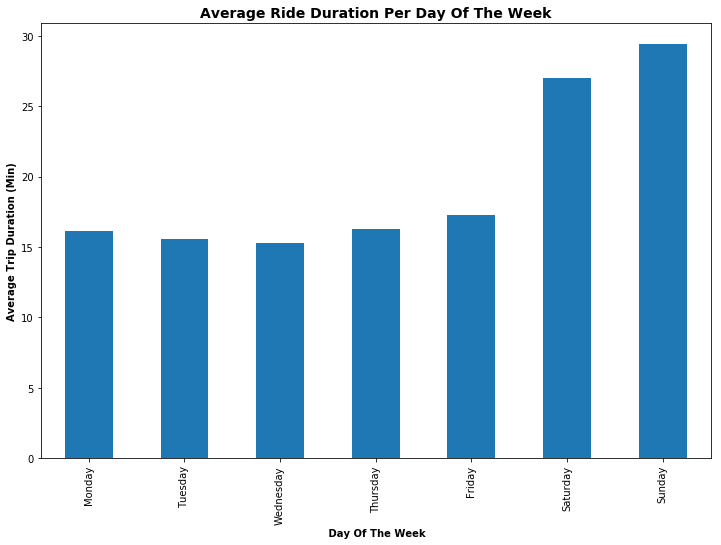

In [15]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
bikedata_week.duration_mins.mean().plot(kind = 'bar', color = base_color);


# Add Labels
plt.title('Average Ride duration per day of the week'.title(),fontsize = 14, weight = 'bold')
plt.xlabel(' Day of the week'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Average Trip Duration (min)'.title(),fontsize = 10, weight = 'bold');
plt.show()

## Average Ride Duration By User Type

Customers have longer ride duration than subscribers


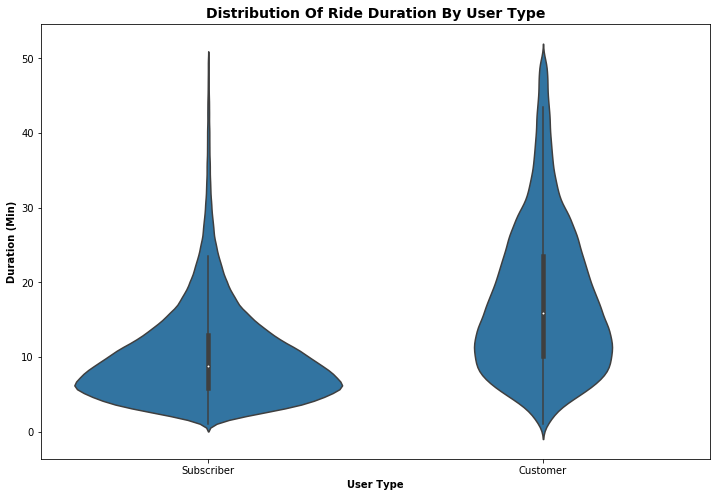

In [16]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
sb.violinplot(data = bikedata_sub, x = 'user_type', y = 'duration_mins',color = base_color)

# Add Labels
plt.title('Distribution of Ride Duration by user type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('user type'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('Duration (min)'.title(),fontsize = 10, weight = 'bold');

plt.show()

## Number of rides per user type and per weekday

subscribers ride mostly on weekdays and customers mostly on weekends. Subscribers on weekdays record more number of rides

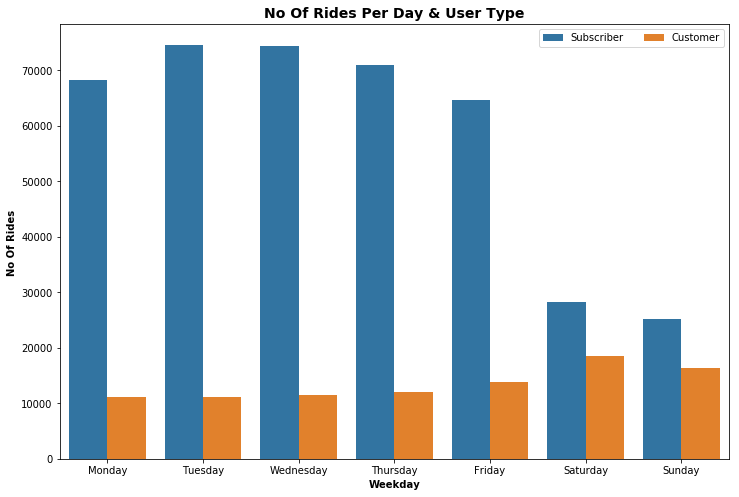

In [17]:
plt.figure(figsize = [12,8])
ax = sb.countplot(data = bikedata_sub, x = 'weekday', hue = 'user_type')
ax.legend(loc = 1 , ncol = 2)

# Add Labels
plt.title('No of Rides per day & user type'.title(),fontsize = 14, weight = 'bold')
plt.xlabel('weekday'.title(),fontsize = 10, weight = 'bold')
plt.ylabel('No of Rides '.title(),fontsize = 10, weight = 'bold');

plt.show()

## Average ride duration by weekday for each user type

This plot shows that Average trip duration depends on the user type. Customers although have less number of rides than subscribers in the rider ship they tend to have longer duration of ride.


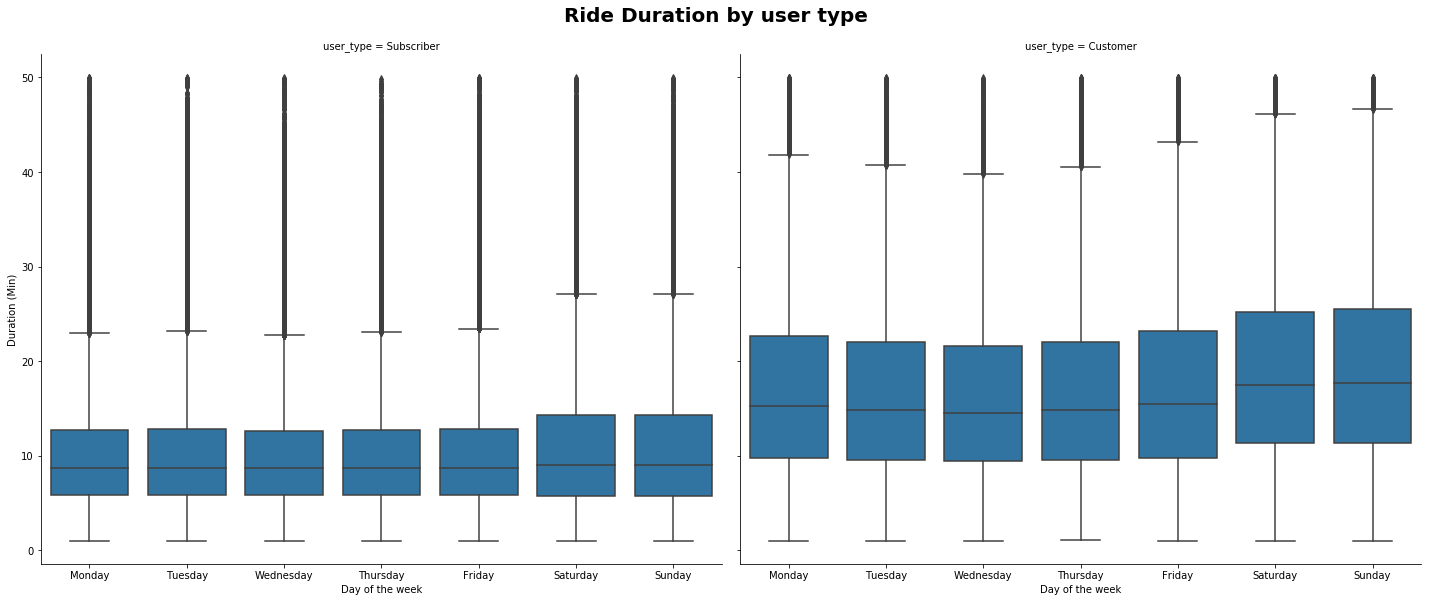

In [51]:
g = sb.FacetGrid(data = bikedata_sub, col = 'user_type', height = 8, aspect = (20/2)/8, margin_titles = True)
g.map(sb.boxplot, 'weekday', 'duration_mins')
plt.suptitle("Ride Duration by user type", y = 1.04, fontsize = 20, weight = 'bold');
g.set_axis_labels('Day of the week', 'Duration (Min)');
plt.show()

In [38]:
bikedata_user_day = bikedata.groupby(['user_type','weekday'])
bikedata_user_day.duration_mins.mean()

user_type   weekday  
Customer    Monday       41.814485
            Tuesday      39.144952
            Wednesday    38.327595
            Thursday     40.209360
            Friday       40.039432
            Saturday     44.581283
            Sunday       49.738875
Subscriber  Monday       11.341740
            Tuesday      11.569680
            Wednesday    11.314927
            Thursday     11.624314
            Friday       11.667631
            Saturday     13.318471
            Sunday       13.540184
Name: duration_mins, dtype: float64

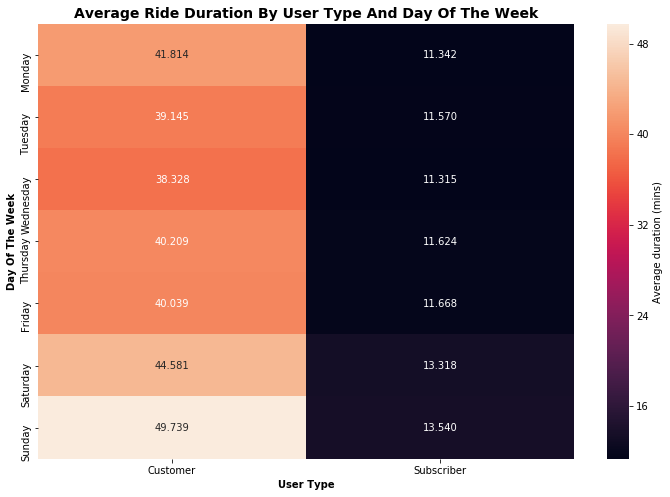

In [18]:
plt.figure(figsize = [12,8])

cat_means = bikedata.groupby(['user_type', 'weekday']).mean()['duration_mins']
cat_means = cat_means.reset_index(name = 'avg_duration_mins')
cat_means = cat_means.pivot(index = 'weekday', columns = 'user_type',
                            values = 'avg_duration_mins')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'Average duration (mins)'})

# Add Labels
plt.title("Average ride duration by user type and day of the week".title(), fontsize = 14, weight = 'bold')
plt.xlabel('User Type'.title(), fontsize = 10, weight = 'bold')
plt.ylabel('Day of the week'.title(), fontsize = 10, weight = 'bold');

Based on the above plots we can establish that average trip duration and number of rides vary by cutomer type and their usage. Subscriber have more trips and tend to have shorter duration of the trip. They also use bikes mostly on weekdays. Weekdays are typically working days and subscribers may be mostly using the bikes for commuting. Hence these trips tend to be shorted in duration. Customers have less trips than subscribers but they ride mostly on weekends. Average trip duration for these users is also high compared to subscribers. This is different pattern of consumption of bike ridership than subscribers. Customers may be using the bikes to explore the city and these activities late longer time.



> check the output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure to remove all of the quote-formatted guide notes like this one
before you finish your presentation!